In [1]:
import pandas as pd
from scipy.stats import entropy
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,  export_graphviz
from sklearn import tree
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer



import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree


In [2]:
def data_import(df):
    import_df = pd.read_csv(f'../Data/wildfires_{df}.txt', sep='\t')
    
    for column in import_df:
        try:
            import_df[column] = import_df[column].str.strip()
        except:
            pass
        return import_df

df = pd.DataFrame(data_import('training'))
#df.reset_index(inplace=True, drop=False)

## Calculate information gain thresholds for continuous fields 
- Temp
- Humidity
- Rainfall
- Drought Code
- Buildup Index
- wind Speed

In [4]:
# Calculate entropy for the dataset
mask = df['fire']=='yes'
S = entropy([len(df[mask]), len(df[~mask])] ,base=2)
S

0.9995132881417702

In [37]:
#Cleaning Data

#Rainfall has a max sigma of 7.1 - this is a less than 1/million. Will remove this from the dataset
index_val = df[df['rainfall']>= (df['rainfall'].mean()+(df['rainfall'].std()*6))].index
df.drop(index_val, inplace=True)


# Quantising the data

In [39]:
df['Date'] = pd.to_datetime(df[["year", "month", "day"]])
df['weekday'] = df.Date.dt.weekday
df.loc[(df['weekday']<=4), 'weekend'] = 0
df.loc[(df['weekday'] >=5), 'weekend'] = 1


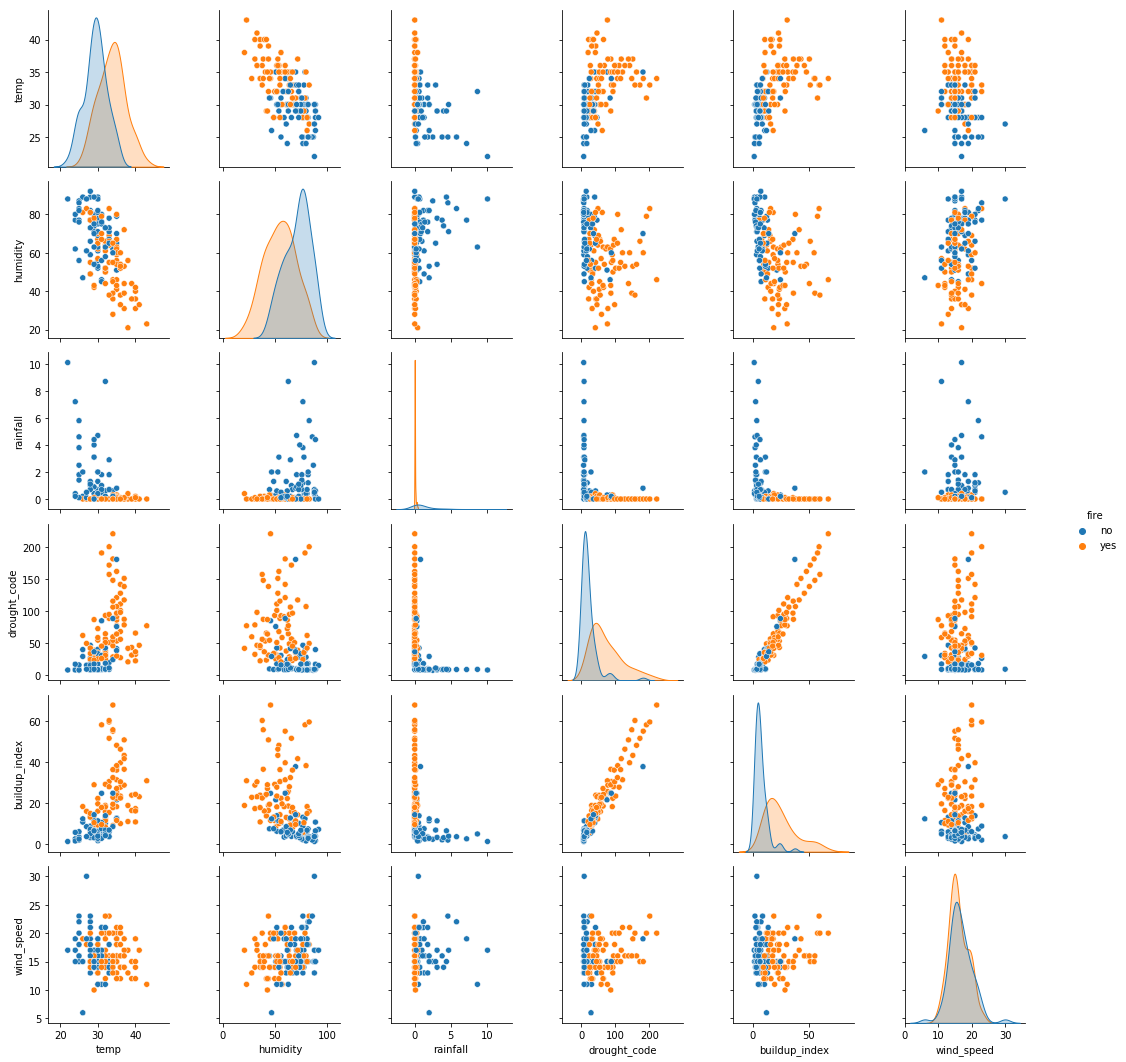

In [46]:
sns.pairplot(df, vars=['temp', 'humidity', 'rainfall', 'drought_code','buildup_index', 'wind_speed'], hue='fire')

In [61]:
target = 'fire'
#features = ['temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index',  'wind_speed']
features = ['drought_code', 'buildup_index', 'temp', 'humidity']

X = df[features]
y = df[target]

In [62]:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 0, criterion='entropy')# Step 3: Train the model on the data
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

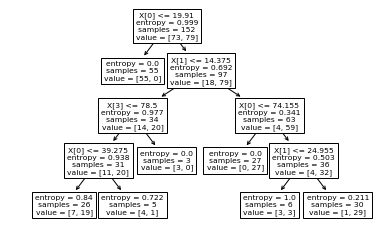

In [63]:
tree.plot_tree(clf);

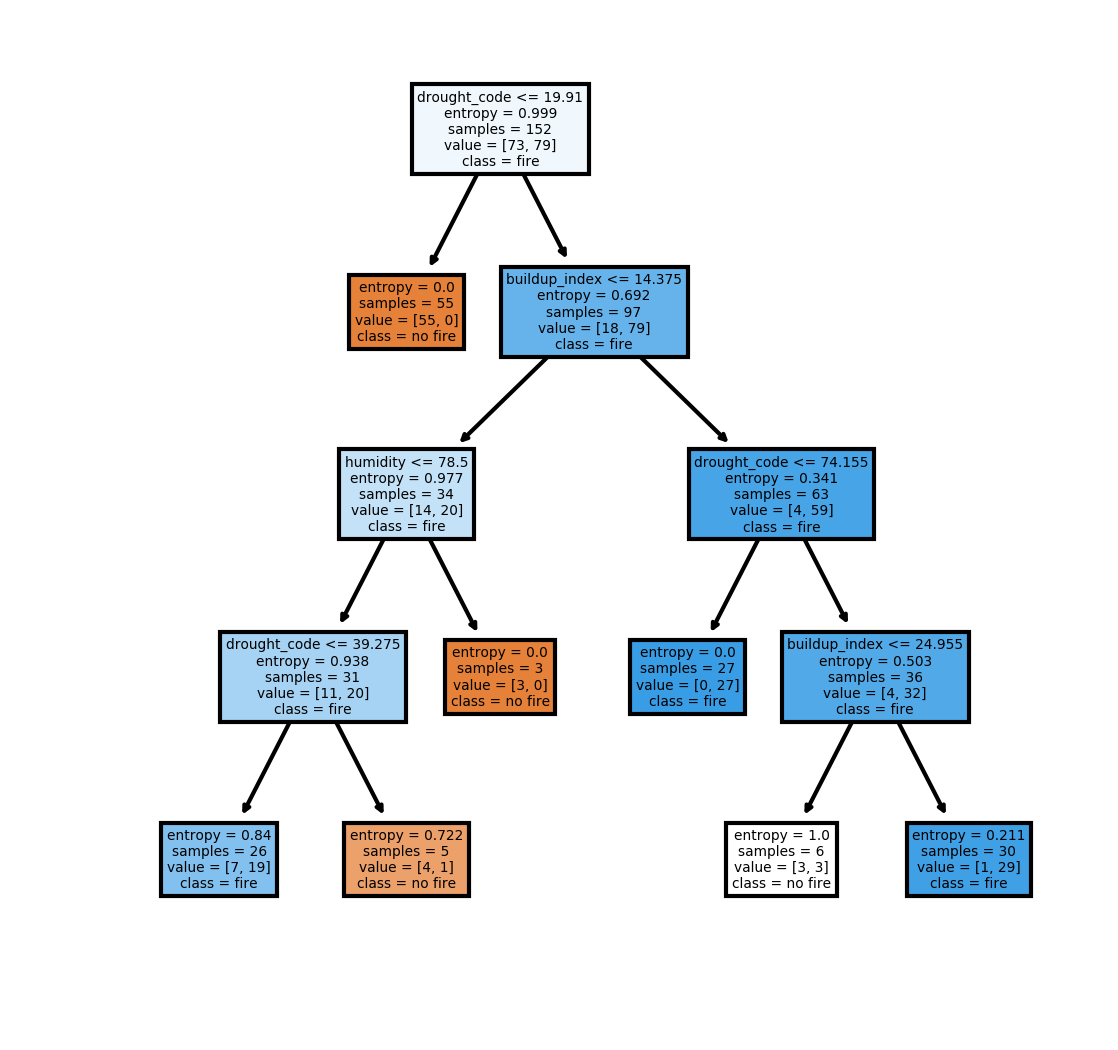

In [65]:
#fn=['temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'wind_speed']
fn=['drought_code', 'buildup_index', 'temp', 'humidity']

cn=['no fire', 'fire']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = fn, class_names=cn, filled = True);



In [66]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [67]:
test_df = data_import('test')

In [68]:
y_pred = clf.predict(test_df[features])

In [69]:
pd.DataFrame(y_pred).to_excel("predicted outcome.xlsx")